## Importation des libraries et du Drive

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_dir = "D:/ising/data/data/"


# Première Analyse des données

### Données à Température fixée

In [3]:
def read_t(t,root="./", str_check=False):
  if not str_check :
    data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=%.2f.pkl'%t,'rb'))
  else :
    data = pickle.load(open(root+f'Ising2DFM_reSample_L40_T={t}.pkl','rb'))
  return np.unpackbits(data).astype(int).reshape(-1,1600)

### Analyse du fichier de données totale

### Concatenation des données et Creation des Labels

# CNN
## Preprocessing

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ReLU,UpSampling2D, CategoryEncoding, Reshape, Lambda
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

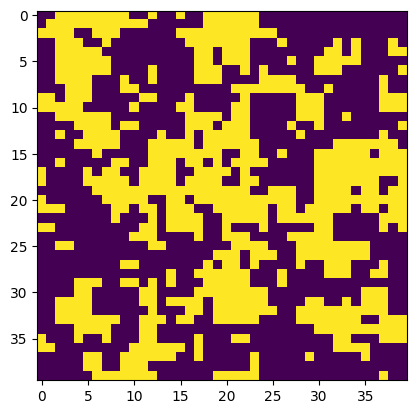

In [5]:

Data_All = []
Data_Label = []
for T in np.arange(0.25,4.25,0.25):
    data_all = read_t('%.2f'%T, file_dir, True)
    data_all.shape
    
    mean_val = data_all.reshape(data_all.shape[0], 40*40).mean(axis=1)
    data_all = data_all.astype(np.uint8)
    
    data_all[mean_val > 0.5] = np.invert(data_all[mean_val > 0.5])//255
    data_all.shape
    data_label = np.array([T]*data_all.shape[0])
    Data_All.append(data_all)
    Data_Label.append(data_label)
    
Data_All = np.array(Data_All)
Data_Label = np.array(Data_Label)

plt.imshow(Data_All[10][0].reshape(40,40))

In [6]:
Data_All.shape
Data_All[0].shape[0]

10000

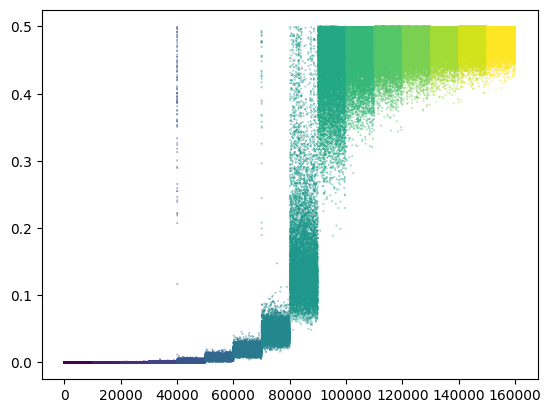

In [7]:

plt.scatter(range(160000), Data_All.reshape(160000, 40*40).mean(axis=1), s=0.05,c = Data_Label.reshape(160000,))

In [8]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import tensorflow as tf
tf.config.list_physical_devices('GPU')


Num GPUs Available:  1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## modèle

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
import time
import tensorflow as tf
from tensorflow.keras import layers, Model
VEC=[]
VEC1=[]
Tliste = np.arange(0.25,4.25,0.25)
for i in np.flip(np.arange(16)):

    time.sleep(1)
     
    
    class Autoencoder(Model):
        def __init__(self):
            super(Autoencoder, self).__init__()
            self.encoder = tf.keras.Sequential([
                
                layers.Input(shape=(40, 40, 1)),
                layers.Conv2D(5, (7, 7), activation='relu', padding='same'),
                layers.Conv2D(5, (3, 3),padding='same', activation='relu'),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(5, (3, 3),padding='same', activation='relu'),
                layers.Conv2D(15, (3, 3), activation='relu', padding='same'),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(15, (3, 3), activation='relu', padding='same'),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(15, (3, 3), activation='relu', padding='same'),
                layers.Conv2D(1, (5, 5), activation='relu', padding='same'),
    
            ])
            
            self.decoder = tf.keras.Sequential([
                layers.Input(shape=(5, 5, 1)),
                layers.UpSampling2D((2,2), interpolation = 'nearest'),
                layers.Conv2D(5, (5, 5),padding='same', activation='relu'),
                layers.UpSampling2D((2,2), interpolation = 'nearest'),
                layers.Conv2D(3, (3, 3),padding='same', activation='relu'),
                layers.UpSampling2D((2,2), interpolation = 'nearest'),
                layers.Conv2D(3, (5, 5),padding='same', activation='relu'),
                layers.Conv2D(1, (3, 3),padding='same', activation='sigmoid'),
    
            ])
        def call(self, x):
            encoded = self.encoder(x)
            decoded = self.decoder(encoded)
            return decoded
    
    autoencoder = Autoencoder()


    # Compile the model
    autoencoder.compile(loss='binary_crossentropy', optimizer='adam')




    
    
    tot_data_cnn = Data_All[i].reshape(Data_All[i].shape[0], 40, 40, 1)
    print(tot_data_cnn.shape)
    X_train, X_test, y_train, y_test = train_test_split(tot_data_cnn, data_label, test_size=0.2, random_state=42)
    history = autoencoder.fit(X_train, X_train, epochs=130, batch_size=264,
                  validation_split=0.2)
    encoded_imgs = autoencoder.encoder(X_test).numpy()
    decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
    plt.show()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss Evolution T = {}'.format(Tliste[i]))
    plt.savefig('D:/ising/evoltution T = {} .jpg'.format(Tliste[i]),dpi=300)
    plt.show()

    
    n = 10
    T = Tliste[i]
    
    plt.figure(figsize=(20, 8))
    for j in range(n):
        img = np.copy(decoded_imgs[j])
        # display original
        ax = plt.subplot(3, n, j + 1)
        plt.imshow(X_test[j])
        plt.title("ratio = {}".format(np.sum(X_test[j].reshape(1600))/1600))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display reconstruction
        ax = plt.subplot(3, n, j + 1 + n)
        plt.imshow(decoded_imgs[j])
        plt.title("reconstructed")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(3, n, j + 1 + 2*n)
        img= 2*np.random.normal(0.2,0.15,1600) + 1.5*img.reshape(1600) + 6*np.random.normal(-0.1,0.02,1600)
        ratio = T/4
        sig = -1/(2+2*np.exp(-(T-2)*4))+1
        img[img<=sig]=0
        img[img>sig]=1
        img = img.reshape(40,40)
        plt.imshow(img)
        plt.title("ratio = {}".format(np.sum(img.reshape(1600))/1600))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.text(-400,60,'image original, prédite avec un espace latent dim = 25, et reconstruite avec bruit, T = {}'.format(Tliste[i]),size = 20)
    plt.savefig('D:/ising/triple_T = {} .jpg'.format(Tliste[i]),dpi=300)
    plt.show()
    time.sleep(1)
    
    encoded_imgs1 = autoencoder.encoder(X_train).numpy()
    vec1 = np.sum(encoded_imgs1.reshape(np.shape(encoded_imgs1)[0],25),axis=0)
    VEC1.append(vec1)
    vec = np.sum(encoded_imgs.reshape(np.shape(encoded_imgs)[0],25),axis=0)
    VEC.append(vec)
    if np.sum(vec1)==0:
        plt.plot(range(25),vec1,label='X_train')
    if np.sum(vec)==0:
        plt.plot(range(25),vec,label='X_test')
    elif np.sum(vec1)!=0:  
        plt.plot(range(25),vec1/np.sum(vec1),label='X_train')
    elif np.sum(vec)!=0:  
        plt.plot(range(25),vec/np.sum(vec),label='X_test')
    plt.xlabel('composante nbr')
    plt.ylabel('amplitude')
    plt.legend()
    plt.title('vecteur moyen des données T = {} dans le sous espace latent'.format(Tliste[i]))
    plt.savefig('D:/ising/latent_T = {} .jpg'.format(Tliste[i]),dpi=300)
    plt.show()
    del X_train
    del X_test
    time.sleep(1)
    
